# Data Analytics KPMG TASK-2

Their marketing team is looking to boost business by 
analysing their existing customer dataset to determine customer trends and behaviour. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
custadress = pd.read_csv('csv2/custaddress.csv', delimiter=';', low_memory=False, encoding='latin-1')
transactions = pd.read_csv('csv2/transactions.csv', delimiter=';', low_memory=False, encoding='latin-1')
custdemographic = pd.read_csv('csv2/custdemographic.csv', delimiter=';', low_memory=False, encoding='latin-1')
newcustlist = pd.read_csv('csv2/newcustlist.csv', delimiter=';', low_memory=False, encoding='latin-1')

### Custaddress

In [3]:
custadress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [9]:
custadress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [11]:
custadress.shape

(3999, 6)

In [12]:
custadress.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [14]:
custadress.isnull().any()

customer_id           False
address               False
postcode              False
state                 False
country               False
property_valuation    False
dtype: bool

In [15]:
custadress.duplicated().any()

False

summary :
   1. no duplicate values
   2. no null values
   3. 9999 rows, 6 colomns

### Transaction

In [19]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,"71,49","$53,62",41245.0
1,2,3,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,"2091,47","$388,92",41701.0
2,3,37,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,"1793,43","$248,82",36361.0
3,4,88,3135,31/08/2017,False,Approved,Norco Bicycles,Standard,medium,medium,"1198,46","$381,10",36145.0
4,5,78,787,01/10/2017,True,Approved,Giant Bicycles,Standard,medium,large,"1765,3","$709,48",42226.0


In [20]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             19640 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  object 
 11  standard_cost            19803 non-null  object 
 12  product_first_sold_date  19803 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 2.0+ MB


In [21]:
transactions.shape

(20000, 13)

In [23]:
transactions.duplicated().any()

False

In [25]:
transactions.isnull().any()

transaction_id             False
product_id                 False
customer_id                False
transaction_date           False
online_order                True
order_status               False
brand                       True
product_line                True
product_class               True
product_size                True
list_price                 False
standard_cost               True
product_first_sold_date     True
dtype: bool

**misiing values at**
1. online oreder, 
2. brand, 
3. product_line, 
4. product_class, 
5. product_size
6. standard_cost
7. product_first_sold_date  

In [42]:
transactions.order_status.value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [32]:
transactions.online_order.value_counts()

True     9829
False    9811
Name: online_order, dtype: int64

In [34]:
transactions['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [37]:
transactions['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [39]:
transactions['standard_cost'].value_counts()

$388,92        465
$954,82        396
$53,62         274
$161,60        235
$260,14        233
              ... 
$151,96        124
$206,35        114
312,7350159      1
270,2999878      1
667,4000244      1
Name: standard_cost, Length: 103, dtype: int64

In [40]:
transactions['product_first_sold_date'].value_counts()

33879.0    234
41064.0    229
37823.0    227
39880.0    222
38216.0    220
          ... 
41848.0    169
42404.0    168
41922.0    166
37659.0    163
34586.0    162
Name: product_first_sold_date, Length: 100, dtype: int64

In [61]:
transactions.describe(include=["object"])

,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
count,20000,19640,20000,19803,19803,19803,19803,20000,19803
unique,364,2,2,6,4,3,3,296,103
top,14/02/2017,True,Approved,Solex,Standard,medium,medium,"2091,47","$388,92"
freq,82,9829,19821,4253,14176,13826,12990,465,465


**summary transaction:**
 1. any 20000 rows, 13 columns
 2. missing values at online order,brand, product_line,product_class, product_size, standard_cost, product_first_sold_date 
 3. top transaction 14 February 2017
 4. for order mostly is true, and approved
 5. top brand is Solex with product line standard
 5. top product class and product size is medium
 6. for top process is 2019,47
 7. for top standard cost = 388,92


## handle missing values

In [52]:
transactions['online_order'].isnull().sum()

360

<AxesSubplot:xlabel='product_first_sold_date', ylabel='Density'>

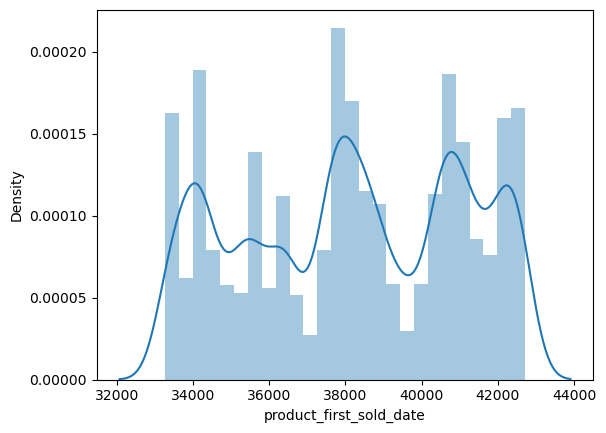

In [70]:
sns.distplot(transactions['product_first_sold_date'])

ValueError: could not convert string to float: '$53,62'

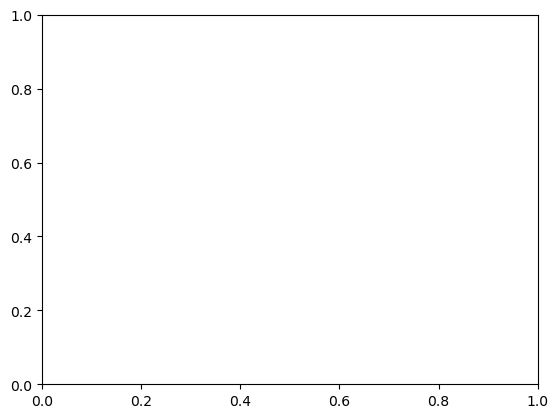

In [72]:
sns.distplot(transactions['standard_cost'])

In [54]:
transactions['product_line'].isnull().sum()

197

In [53]:
transactions['brand'].isnull().sum()

197

In [54]:
transactions['product_line'].isnull().sum()

197

In [55]:
transactions['product_class'].isnull().sum()

197

In [56]:
transactions['product_size'].isnull().sum()

197

In [57]:
transactions['standard_cost'].isnull().sum()

197

In [58]:
transactions['product_first_sold_date'].isnull().sum()

197

In [5]:
custdemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,12/10/1953,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,16/12/1980,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,20/01/1954,Recruiting Manager,Property,Mass Customer,N,01-Feb,Yes,15.0
3,4,Talbot,NaN,Male,33,03/10/1961,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,13/05/1977,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [6]:
newcustlist.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,12/07/1957,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,"0,75","0,9375","1,171875","0,99609375",1,1,"1,71875"
1,Morly,Genery,Male,69,22/03/1970,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,"0,55","0,55","0,6875","0,584375",1,1,"1,71875"
2,Ardelis,Forrester,Female,10,28/08/1974,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,"0,91","0,91","0,91","0,91",1,1,"1,71875"
3,Lucine,Stutt,Female,64,28/01/1979,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,"1,06","1,325","1,325","1,325",4,4,"1,703125"
4,Melinda,Hadlee,Female,34,21/09/1965,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,"0,8","0,8",1,1,4,4,"1,703125"


In [8]:
custadress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB
